### Read and explore groundwater head data

In acequia, the GwSeries object holds groundwater head data for one piezometer. For reading data the GwSeries.from_dinogws() and GwSeries.from_json() methods are used. The object GwList holds a list of GwSeries objects and is able to read multiple series given a source directory. For managing multiple head series from one well location the GwLoc object is used.  

This notebook shows how to read a dinoloket csv file into the Acequia GwSeries object and explore it's content. Also, examples of using the GwList and GwLoc objects are given.

In [1]:
import acequia as aq

## Read groundwater head data from a DinoLoket csv file

The main source of groundwater head data in the Netherlands is the National groundwater database managed by TNO. Data can be downloaded free of charge from www.dinoloket.nl. Data are delivered as csv files that contain measurements from one piezometer.  
Dinoloket csv files start with a main header, followed by a block of data with properties of the piezometer over time, followed by groundwater head measurements. As the database behind Dinloket.nl contains over 80.000 files some of them are bound to contain unexpected data. Over the last few years, acequia has been applied to all Dinoloket files several times and errors in csv files are mostly handled now, but new issues are bound te arise over time. 

Data from Dinoloket csv files can be imported to the GwSeries object with the from_dinogws method. As shown by the GwSeries print() method, the groundwater head series B28A0475_2 contains 2687 measurements:

In [2]:
fpath = ".\\data\\dinocsv\\B28A0475002_1.csv"
gw = aq.GwSeries.from_dinogws(fpath)
print(gw)

B28A0475_2 (n=2687)


## Explore well tube properties

Properties of the well tube and the measured groundwater head series can be explored with the GwSeries.locprops() and GwSeries.tubeprops() methods. All height measurements are in m NAP, the National Dutch Datum:  

In [3]:
gw.locprops()

locname filname     alias     xcr     ycr height_datum  \
B28A0475_2  B28A0475       2  28AP7039  220340  494130         mNAP   

           grid_reference  
B28A0475_2             RD

In [4]:
gw.tubeprops()

series  startdate  mplevel  filtop  filbot surfacedate  surfacelevel
0  B28A0475_2 1981-01-01     5.46   -3.54   -4.54  1981-01-01          5.43
1  B28A0475_2 2008-03-01     5.93   -3.54   -4.54  1981-01-01          5.43

The GwSeries.tubeprops_changes() method returns a time series of welltube changes over time. The GwSeries.plotheads() method uses tubeprops_changes() to visualise changes in groundwater regime in conjunction with changes in measurement point reference hight, which might indicate that changes in groundwater measurments are caused by a change in the well construction instead of changes in the groundwater system:

In [5]:
gw.tubeprops_changes()

1981-01-01    0.00
2008-02-29    0.00
2008-03-01    0.47
2014-09-15    0.47
dtype: float64

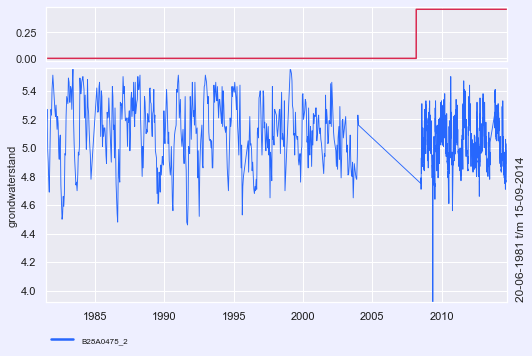

In [6]:
gw.plotheads(proptype='mplevel')

## Descriptive statistics of measured head series

Measured heads in a GwSeries object are returned as a pandas Series object with the heads() method. The parameter 'ref' determines the reference level and defaults to 'datum'. Other possible reference levels are 'surface' and 'mp' (measurement point).

In [22]:
sr = gw.heads(ref='datum')
print(sr)

datetime
2015-10-29    19.69
2015-10-30    19.68
2015-10-31    19.67
2015-11-01    19.66
2015-11-02    19.66
              ...  
2019-08-24    19.04
2019-08-25    19.02
2019-08-26    19.01
2019-08-27    19.01
2019-08-28    19.00
Name: B29A0849_4, Length: 1400, dtype: float64


Basic decriptive statistics of the head series are shown by the GwSeries.timestats() method:

In [7]:
gw.timestats()

firstdate    lastdate  minyear  maxyear  yearspan  nyears  mean  \
B28A0475_2  1981-06-20  2014-09-15     1981     2014        34      30  5.04   

            median   q05   q95  dq0595  
B28A0475_2    5.03  4.78  5.33    0.55

In the Netherlands a special set of desciptive statistics is used, known as the "GxG". The GxG consists of several measures: mean highest groundwater level (GHG), mean spring level (GVG) and mean lowest groundwater level (GLG). Over the last 50 years several different definitions have been used, some of which are implemented in Acequia. For technical details, users are referred to the docstrings in the Acequia Gxg object methods.

In [8]:
gw.gxg(ref='surface')

ghg   glg  ghg3w  glg3s  gvg3  gvg1  n1428  ghg3nyr  glg3nyr  \
B28A0475_2  0.07  0.63    0.1    0.6  0.28  0.26  15.23       17       17   

            ghg3wnyr  glg3snyr  gvg3nyr  gvg1nyr  n1428nyr  gt    gtref  
B28A0475_2        17        17       21       28        35  II  surface

The GwSeries.describe() method returns a pandas DataFrame with general characteristics of the head series. This method is useful to generate a pandas dataframe with timeseries characteristics of several timeseries that can be imported in a Geographical Information System like QGIS or ArcMAP. (To do this, apply the describe() method over a list of GwSeries objects and concatenate all dataframes with pd.concat).

In [9]:
gw.describe()

locname filname     alias     xcr     ycr  mplevel  filbot  \
B28A0475_2  B28A0475       2  28AP7039  220340  494130     5.93   -4.54   

            surfacelevel   firstdate    lastdate  minyear  maxyear  yearspan  \
B28A0475_2          5.43  1981-06-20  2014-09-15     1981     2014        34   

            nyears  mean  median   q05   q95  dq0595  
B28A0475_2      30  5.04    5.03  4.78  5.33    0.55

Measured heads from GwSeries objects can be saved to simple csv files with the method to_csv(). For archiving GwSeries data from different sources in one json file format the to_json() method is used. These data can be imported in a GwSeries with the from_json() method.

## Manage lists of groundwater head series 

The GwList object reads multiple groundwater head source files from a directory. After a GwList object is succesfully created, a list of sourcefiles is given with the method GwList.filetable().

In [10]:
gwlist = aq.GwList(srcdir='.\\data\\dinocsv\\', loclist=None)

In [11]:
gwlist.filetable()

file       loc fil kaartblad      series  \
0   B28A0475002_1.csv  B28A0475   2       28A  B28A0475_2   
1   B28B1389001_1.csv  B28B1389   1       28B  B28B1389_1   
2   B28B1389002_1.csv  B28B1389   2       28B  B28B1389_2   
3   B28B1389003_1.csv  B28B1389   3       28B  B28B1389_3   
4   B28F1490001_1.csv  B28F1490   1       28F  B28F1490_1   
5   B28F1490002_1.csv  B28F1490   2       28F  B28F1490_2   
6   B28F1490003_1.csv  B28F1490   3       28F  B28F1490_3   
7   B28F1490004_1.csv  B28F1490   4       28F  B28F1490_4   
8   B28H1883001_1.csv  B28H1883   1       28H  B28H1883_1   
9   B28H1883002_1.csv  B28H1883   2       28H  B28H1883_2   
10  B28H1883003_1.csv  B28H1883   3       28H  B28H1883_3   
11  B28H1883004_1.csv  B28H1883   4       28H  B28H1883_4   
12  B29A0848001_1.csv  B29A0848   1       29A  B29A0848_1   
13  B29A0848002_1.csv  B29A0848   2       29A  B29A0848_2   
14  B29A0848003_1.csv  B29A0848   3       29A  B29A0848_3   
15  B29A0849001_1.csv  B29A0849   1       29A  B29A0849_1   
16  B29A0849002_1.csv  B29A0849   2       29A  B29A0849_2   
17  B29A0849003_1.csv  B29A0849   3       29A  B29A0849_3   
18  B29A0849004_1.csv  B29A0849   4       29A  B29A0849_4   

                                path  
0   .\data\dinocsv\B28A0475002_1.csv  
1   .\data\dinocsv\B28B1389001_1.csv  
2   .\data\dinocsv\B28B1389002_1.csv  
3   .\data\dinocsv\B28B1389003_1.csv  
4   .\data\dinocsv\B28F1490001_1.csv  
5   .\data\dinocsv\B28F1490002_1.csv  
6   .\data\dinocsv\B28F1490003_1.csv  
7   .\data\dinocsv\B28F1490004_1.csv  
8   .\data\dinocsv\B28H1883001_1.csv  
9   .\data\dinocsv\B28H1883002_1.csv  
10  .\data\dinocsv\B28H1883003_1.csv  
11  .\data\dinocsv\B28H1883004_1.csv  
12  .\data\dinocsv\B29A0848001_1.csv  
13  .\data\dinocsv\B29A0848002_1.csv  
14  .\data\dinocsv\B29A0848003_1.csv  
15  .\data\dinocsv\B29A0849001_1.csv  
16  .\data\dinocsv\B29A0849002_1.csv  
17  .\data\dinocsv\B29A0849003_1.csv  
18  .\data\dinocsv\B29A0849004_1.csv

The GwSeries object has an itermethod that enables iterating over all available GwSeries object and processing them one by one:

In [12]:
for i,gw in enumerate(gwlist):
    print(gw)

B28A0475_2 (n=2687)
B28B1389_1 (n=2515)
B28B1389_2 (n=2515)
B28B1389_3 (n=2515)
B28F1490_1 (n=1414)
B28F1490_2 (n=1414)
B28F1490_3 (n=1414)
B28F1490_4 (n=1414)
B28H1883_1 (n=1420)
B28H1883_2 (n=1420)
B28H1883_3 (n=1421)
B28H1883_4 (n=1420)
B29A0848_1 (n=1400)
B29A0848_2 (n=1400)
B29A0848_3 (n=1400)
B29A0849_1 (n=1400)
B29A0849_2 (n=1400)
B29A0849_3 (n=1400)
B29A0849_4 (n=1400)


The GwLocs object maintains a list of groundwater head series and groups them by well location:

In [17]:
gwlocs = aq.GwLocs('.\\data\\dinocsv\\')
print(gwlocs)

GwLocs(nlocs=6)


The GwLocs object has an itermethod that returns a list of GwSeries object that belong to one well location for each  iteration:

In [16]:
for loc in aq.GwLocs('.\\data\\dinocsv\\'):
        print(loc)

[B28A0475_2 (n=2687)]
[B28B1389_1 (n=2515), B28B1389_2 (n=2515), B28B1389_3 (n=2515)]
[B28F1490_1 (n=1414), B28F1490_2 (n=1414), B28F1490_3 (n=1414), B28F1490_4 (n=1414)]
[B28H1883_1 (n=1420), B28H1883_2 (n=1420), B28H1883_3 (n=1421), B28H1883_4 (n=1420)]
[B29A0848_1 (n=1400), B29A0848_2 (n=1400), B29A0848_3 (n=1400)]
[B29A0849_1 (n=1400), B29A0849_2 (n=1400), B29A0849_3 (n=1400), B29A0849_4 (n=1400)]


The GwSeries object, GwList object and GwLocs object are the main objects for reading and managing groundwater head data with acequia. For most methods in acequia GwSeries object can be used as input as well as pandas timeseries objects containing groundwater head data.